<a href="https://colab.research.google.com/github/Sreelakshmiamenon/Machine-learning-projects/blob/main/32_NLP_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df1 = pd.read_csv("/content/SMS_train (1).csv",encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df2 = pd.read_csv("/content/SMS_test (2).csv",encoding='ISO-8859-1')
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df=pd.concat([df1, df2])
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df['Message_body'].value_counts()

Sorry, I'll call later                                                                                                                                    4
I cant pick the phone right now. Pls send a message                                                                                                       3
K. I will sent it again                                                                                                                                   2
I am in hospital da. . I will return home in evening                                                                                                      2
Oh k. . I will come tomorrow                                                                                                                              2
                                                                                                                                                         ..
I like cheap! But im happy to splash out on the wine if it make

<Axes: xlabel='Message_body', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 145 (\x91) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

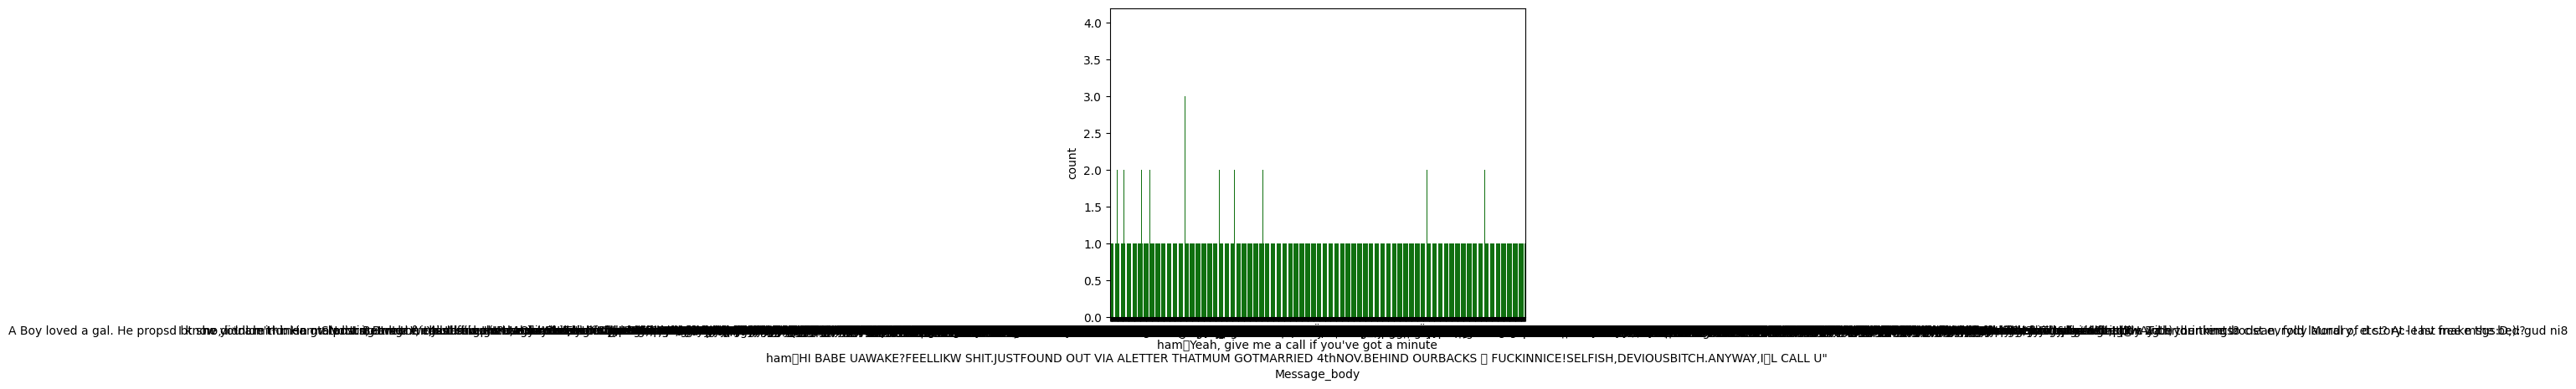

In [ ]:
sns.countplot(x='Message_body',data=df,color='green')

In [ ]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

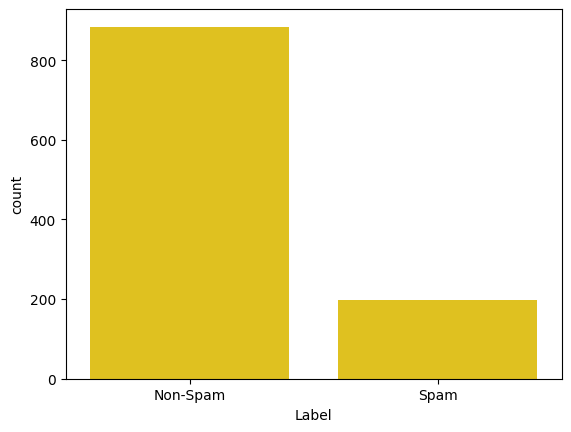

In [ ]:
sns.countplot(x='Label',data=df,color='gold')

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [ ]:
df.dtypes

Message_body    object
Label            int64
dtype: object

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweets= df.Message_body
tweets

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#tokenization
from nltk import TweetTokenizer
tk= TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear . You read something ...
1079    Sun ah ... Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love : " 1 . U like lis...
1081    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#removing special characters

tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-66-aaecc8119f92>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#to remove the words that have less than 3 characters

from nltk.tokenize import word_tokenize
tweets = tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0                                          Rofl true name
1       some bitching acted like interested buying som...
2                        Pity mood that other suggestions
3                               Will going esplanade home
4       This time have tried contact have Pound prize ...
                              ...                        
1077    wonders WORLD style smile Personality Nature L...
1078                  something dear read something exams
1079    mayb have anythin have book lesson pilates orc...
1080    SYMPTOMS when love like listening songs stoppe...
1081            Great Have safe trip Dont panic surrender
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0                                          rofl true name
1       some bitch act like interest buy someth els ne...
2                            piti mood that other suggest
3                                   will go esplanad home
4       this time have tri contact have pound prize cl...
                              ...                        
1077    wonder world style smile person natur love fri...
1078                         someth dear read someth exam
1079     mayb have anythin have book lesson pilat orchard
1080    symptom when love like listen song stop where ...
1081              great have safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets = tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0                                          rofl true name
1       bitch act like interest buy someth els next we...
2                                       piti mood suggest
3                                        go esplanad home
4       time tri contact pound prize claim easi call 0...
                              ...                        
1077    wonder world style smile person natur love fri...
1078                         someth dear read someth exam
1079               mayb anythin book lesson pilat orchard
1080    symptom love like listen song stop name belov ...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [ ]:
#vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data = vec.fit_transform(tweets)
train_data

<1082x2455 sparse matrix of type '<class 'numpy.float64'>'
	with 7231 stored elements in Compressed Sparse Row format>

In [ ]:
train_data.shape

(1082, 2455)

In [ ]:
print(train_data)

  (0, 1499)	0.5086856793431559
  (0, 2250)	0.5352804139572925
  (0, 1849)	0.6743246681420617
  (1, 967)	0.2010387949268906
  (1, 1007)	0.333537298631187
  (1, 2372)	0.23177682686814158
  (1, 1524)	0.269540528115165
  (1, 829)	0.30895867609529615
  (1, 2009)	0.2796938271432502
  (1, 518)	0.34520648750079586
  (1, 1197)	0.32400287709536596
  (1, 1314)	0.2210118888470435
  (1, 276)	0.3602506885008656
  (1, 455)	0.38145429890629556
  (2, 2103)	0.5553533136012975
  (2, 1463)	0.5880402609822133
  (2, 1651)	0.5880402609822133
  (3, 1124)	0.47434824349351795
  (3, 853)	0.7276196298199475
  (3, 1027)	0.4955435583228748
  (4, 1769)	0.29215347411745696
  (4, 1503)	0.33863549998412634
  (4, 1435)	0.3018336316803217
  (4, 1569)	0.2142999601622693
  (4, 54)	0.3872849236392705
  :	:
  (1078, 1774)	0.43205301622076886
  (1078, 715)	0.33483954647191855
  (1078, 867)	0.4197024467361045
  (1078, 2009)	0.7246119827167802
  (1079, 346)	0.4725646068672417
  (1079, 1647)	0.4276590105854556
  (1079, 1583)	0.4

In [ ]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<757x2455 sparse matrix of type '<class 'numpy.float64'>'
	with 5121 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<325x2455 sparse matrix of type '<class 'numpy.float64'>'
	with 2110 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

k_model = KNeighborsClassifier(n_neighbors=7)
n_model = MultinomialNB()
s_model=SVC()
d_model = DecisionTreeClassifier(criterion='entropy')
r_model = RandomForestClassifier()
lst_model = [k_model,n_model,s_model,d_model,r_model]

Model name is KNeighborsClassifier(n_neighbors=7)
[[269   0]
 [ 52   4]]
Accuracy Score =  0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       269
           1       1.00      0.07      0.13        56

    accuracy                           0.84       325
   macro avg       0.92      0.54      0.52       325
weighted avg       0.87      0.84      0.78       325

..................................................
Model name is MultinomialNB()
[[269   0]
 [ 23  33]]
Accuracy Score =  0.9292307692307692
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       269
           1       1.00      0.59      0.74        56

    accuracy                           0.93       325
   macro avg       0.96      0.79      0.85       325
weighted avg       0.93      0.93      0.92       325

..................................................
Model name is SVC()
[[268   1]
 [ 21  35]]
Accuracy Score 

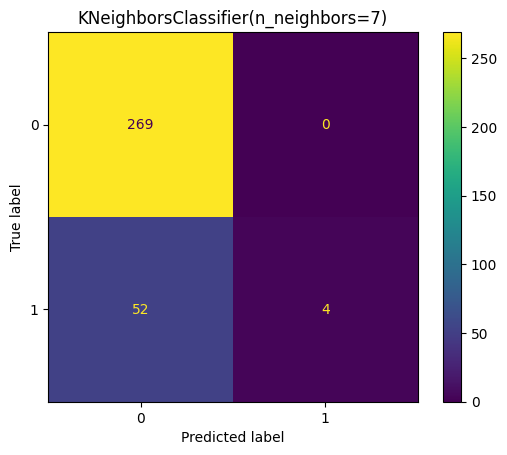

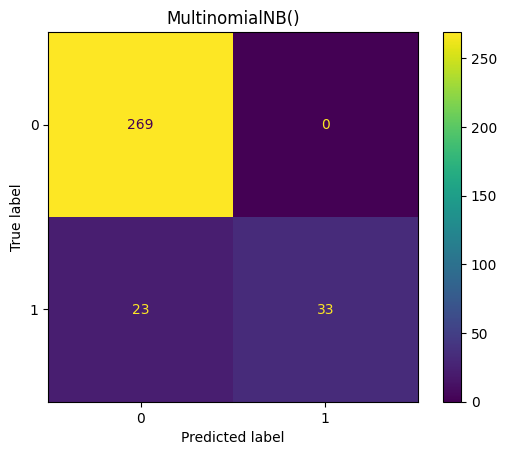

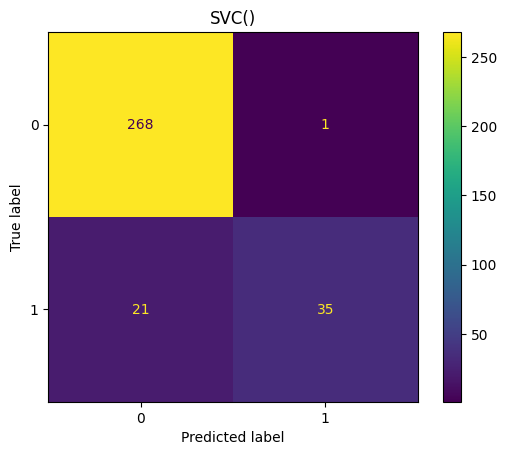

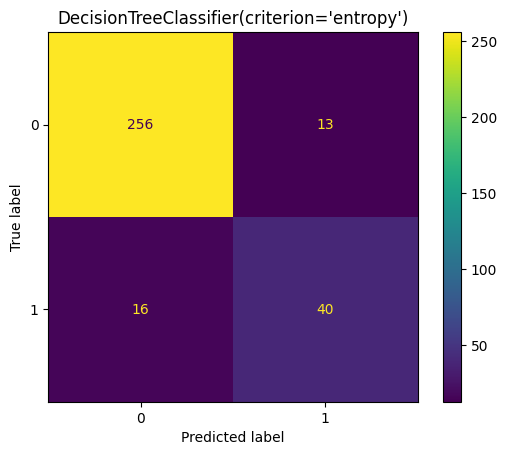

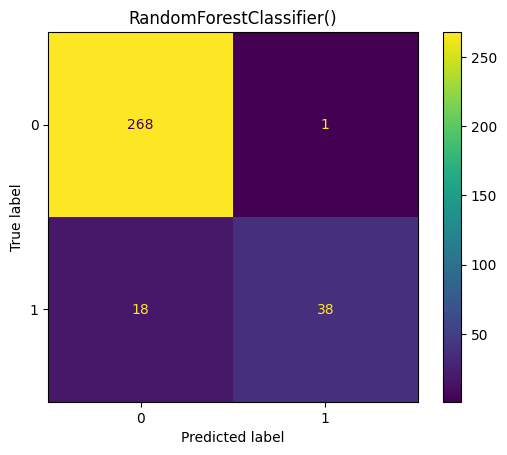

In [ ]:
for i in lst_model:
  print('Model name is',i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  cmd = confusion_matrix(y_test, y_pred)
  print(cmd)
  print('Accuracy Score = ',accuracy_score(y_test,y_pred))

  dis=ConfusionMatrixDisplay(cmd)
  dis.plot()
  plt.title(i)
  print(classification_report(y_test,y_pred))
  print('.'*50)